In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
#Let's import dataset
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape, y.shape)
print(X[0:5,1])
print(X)

(150, 4) (150,)
[3.5 3.  3.2 3.1 3.6]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.

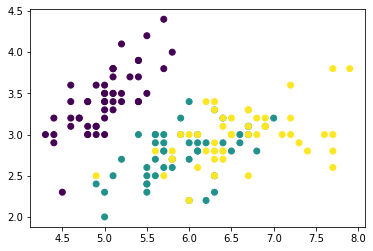

In [3]:
#Représentons le nuage de points
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
#Tirage d'échantillon d'apprentissage et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [5]:
#Entrainons le modèle
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=1)
Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [6]:
print(Model.score(X_train, y_train))
print(Model.score(X_test, y_test))

1.0
0.9666666666666667


In [7]:
y_test_predict = Model.predict(X_test)
print(y_test.shape, y_test, y_test_predict.shape, y_test_predict)

(30,) [1 2 1 1 1 0 0 1 2 1 0 1 2 1 1 2 1 0 1 0 0 1 0 1 1 2 2 0 0 1] (30,) [1 2 1 1 1 0 0 1 2 1 0 1 2 1 2 2 1 0 1 0 0 1 0 1 1 2 2 0 0 1]


In [8]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Model.predict(X_test))

array([[ 9,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  6]], dtype=int64)

***Let's apply the cross validation***

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_neighbors=9), X_train, y_train, cv=10, scoring='accuracy')

array([1.        , 1.        , 0.91666667, 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [10]:
cross_val_score(KNeighborsClassifier(n_neighbors=9), X_train, y_train, cv=10, scoring='accuracy').mean()

0.975

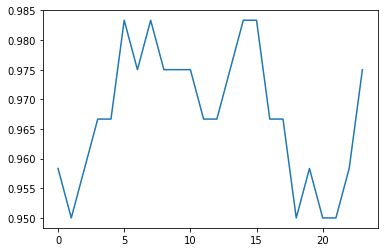

In [11]:
# Let's simulate with n_neighbors
score_list=[]
for k in range(1, 25):
    accuracy_val = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy').mean()
    score_list.append(accuracy_val)
plt.plot(score_list)

In [12]:
print(score_list)

[0.9583333333333333, 0.95, 0.9583333333333334, 0.9666666666666666, 0.9666666666666666, 0.9833333333333334, 0.975, 0.9833333333333334, 0.975, 0.975, 0.975, 0.9666666666666666, 0.9666666666666666, 0.975, 0.9833333333333334, 0.9833333333333334, 0.9666666666666668, 0.9666666666666668, 0.95, 0.9583333333333334, 0.95, 0.95, 0.9583333333333334, 0.975]


In [13]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1, 26)
train_score, test_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
print(train_score.shape, test_score.shape)
print(train_score.mean(axis=1).shape, test_score.mean(axis=1).shape)

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

In [14]:
# Plot of train_score and test_score
plt.plot(k, test_score.mean(axis=1), label = 'Test_Validation')
plt.plot(k, train_score.mean(axis=1), label = 'Train_Validation')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

NameError: name 'test_score' is not defined

In [15]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_neighbors': np.arange(1, 26), 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [16]:
params_grid.keys()

dict_keys(['n_neighbors', 'metric'])

In [17]:
params_grid.get('metric')

['euclidean', 'manhattan', 'minkowski']

In [18]:
#Create GridSearchCV
gridsearch = GridSearchCV(KNeighborsClassifier(), params_grid, cv = 5)

In [19]:
#Application of GridSearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

In [20]:
gridsearch.best_score_

0.9833333333333334

In [21]:
gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 6}